# We rate dogsTweet data清理与分析数据
## 收集

In [1]:
# 导入需要的库
import pandas as pd
import numpy as np
import requests 
import seaborn as sn
import json
import os

In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline    
from pylab import *
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [3]:
pd.set_option('max_colwidth',200)
pd.set_option('precision',2) 

In [4]:
# 收集文件 1 保存为 dataframe
df1=pd.read_csv("twitter-archive-enhanced.csv",encoding='utf-8',sep=',')

In [5]:
# 收集文件 2 保存为 dataframe
url="https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv"
response=requests.get(url)
with open(os.path.join('image-predictions.tsv'),mode='wb') as file:
    file.write(response.content)
df2=pd.read_csv('image-predictions.tsv',sep='\t')

In [6]:
# 收集文件 3 保存为 dataframe
df3=pd.read_json('tweet_json.txt',lines=True)[['id', 'retweet_count', 'favorite_count']]
df3.columns=['tweet_id', 'retweet_count', 'favorite_count']

## 评估
### 目测评估

In [7]:
# 目测评估三个数据集

In [8]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [9]:
df1.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2162,669393256313184256,NaN,NaN,2015-11-25 05:52:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Ronduh. She's a Finnish Checkered Blitzkrieg. Ears look fake. Shoes on point. 10/10 would pet extra well https://t.co/juktj5qiaD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669393256313184256/photo/1,10,10,Ronduh,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
1096,736365877722001409,NaN,NaN,2016-05-28 01:18:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rory. He's extremely impatient. 11/10 settle down pupper https://t.co/e3tfXJLi40,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/736365877722001409/photo/1,https://twitter.com/dog_rates/status/736365877722001409/photo/1,https://twitter.com/dog_rates/status/736365877722001409/photo/1,http...",11,10,Rory,None,None,pupper,None
2254,667782464991965184,NaN,NaN,2015-11-20 19:12:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Super rare dog. Endangered (?). Thinks it's funny. Mocks everything I say. Colorful af. Has wings (dope). 9/10 https://t.co/BY8nQAMz0x,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667782464991965184/photo/1,9,10,None,None,None,None,None
697,786595970293370880,NaN,NaN,2016-10-13 15:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Dale. He's a real spookster. Did me quite the frighten. 11/10 not too spooky to pet tho https://t.co/L8BWDD4oBX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/786595970293370880/photo/1,11,10,Dale,None,None,None,None
2271,667495797102141441,NaN,NaN,2015-11-20 00:12:54 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667495797102141441/photo/1,9,10,Philippe,None,None,None,None
190,855857698524602368,NaN,NaN,2017-04-22 18:55:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","HE'S LIKE ""WAIT A MINUTE I'M AN ANIMAL THIS IS AMAZING HI HUMAN I LOVE YOU AS WELL"" 13/10 https://t.co/sb73bV5Y7S",NaN,NaN,NaN,https://twitter.com/perfy/status/855857318168150016,13,10,None,None,None,None,None
1249,711306686208872448,NaN,NaN,2016-03-19 21:41:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/711306686208872448/photo/1,https://twitter.com/dog_rates/status/711306686208872448/photo/1",3,10,None,None,None,None,None
286,838831947270979586,NaN,NaN,2017-03-06 19:21:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Riley. His owner put a donut pillow around him and he loves it so much he won't let anyone take it off. 13/10 https:…,7.84e+17,4.20e+09,2016-10-06 01:23:05 +0000,"https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/d

In [10]:
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.47,True,collie,1.57e-01,True,Shetland_sheepdog,6.14e-02,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.51,True,miniature_pinscher,7.42e-02,True,Rhodesian_ridgeback,7.20e-02,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.60,True,malinois,1.39e-01,True,bloodhound,1.16e-01,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.41,True,redbone,3.61e-01,True,miniature_pinscher,2.23e-01,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.56,True,Rottweiler,2.44e-01,True,Doberman,1.55e-01,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.65,True,English_springer,2.64e-01,True,Greater_Swiss_Mountain_dog,1.62e-02,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.93,False,mud_turtle,4.59e-02,False,terrapin,1.79e-02,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.69,True,Tibetan_mastiff,5.83e-02,True,fur_coat,5.44e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.96,False,shopping_basket,1.46e-02,False,golden_retriever,7.96e-03,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.20,True,komondor,1.92e-01,True,soft-coated_wheaten_terrier,8.21e-02,True


In [11]:
df2.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1154,732732193018155009,https://pbs.twimg.com/media/CiswCQhWYAI5-QW.jpg,1,koala,0.16,False,Staffordshire_bullterrier,0.13,True,mongoose,0.10,False
66,667176164155375616,https://pbs.twimg.com/media/CUJJLtWWsAE-go5.jpg,1,soft-coated_wheaten_terrier,0.32,True,Lakeland_terrier,0.22,True,toy_poodle,0.11,True
1856,841439858740625411,https://pbs.twimg.com/media/C61lFFiWoAAJdiL.jpg,3,military_uniform,0.85,False,Labrador_retriever,0.05,True,groenendael,0.02,True
1221,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1,Labrador_retriever,0.83,True,ice_bear,0.04,False,whippet,0.02,True
1743,822859134160621569,https://pbs.twimg.com/media/C2tiAzGXgAIFdqi.jpg,1,malinois,0.33,True,Chihuahua,0.10,True,Staffordshire_bullterrier,0.05,True
1485,781661882474196992,https://pbs.twimg.com/media/CtkFS72WcAAiUrs.jpg,1,Pembroke,0.44,True,golden_retriever,0.23,True,collie,0.07,True
556,677673981332312066,https://pbs.twimg.com/media/CWeU5LBWEAA8F0J.jpg,1,Maltese_dog,0.82,True,Angora,0.08,False,Pomeranian,0.02,True
1931,859074603037188101,https://pbs.twimg.com/media/C-wLyufW0AA546I.jpg,1,revolver,0.19,False,projectile,0.15,False,fountain,0.07,False
1613,801958328846974976,https://pbs.twimg.com/media/CyEg2AXUsAA1Qpf.jpg,1,Staffordshire_bullterrier,0.33,True,American_Staffordshire_terrier,0.27,True,Labrador_retriever,0.25,True
70,667192066997374976,https://pbs.twimg.com/media/CUJXpRBXIAAN0yz.jpg,1,Rottweiler,0.28,True,miniature_pinscher,0.15,True,black-and-tan_coonhound,0.10,True


In [12]:
df3

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016
5,891087950875897856,3240,20548
6,890971913173991426,2142,12053
7,890729181411237888,19548,66596
8,890609185150312448,4403,28187
9,890240255349198849,7684,32467


In [13]:
df3.sample(10)

,tweet_id,retweet_count,favorite_count
1454,695074328191332352,1234,3097
1977,672970152493887488,386,1014
421,821522889702862852,2021,8842
1221,714141408463036416,1560,4657
423,821407182352777218,5031,13026
266,841320156043304961,6056,21340
992,748337862848962560,4673,8415
2208,668587383441514497,1170,1753
2327,666353288456101888,76,228
425,821149554670182400,2309,9678


通过初步了解，表1的结构存在问题，后四列狗狗种类可以归为一类。
三张表可以通过tweet_id结合为一张表。方便分析。

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

### 编程评估

In [14]:
df1_clean=df1.copy()
df2_clean=df2.copy()
df3_clean=df3.copy()

In [15]:
df1_clean.info()#发现数据类型需要更改

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
df1_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [17]:
df1_clean.duplicated().value_counts()#发现没有重复行

False    2356
dtype: int64

In [18]:
df1_clean['expanded_urls'].isnull().value_counts()#发现URL有空值，由于后续跟表2合并采用inner的方式，直接排除了没有图片的推特，所以暂不处理。

False    2297
True       59
Name: expanded_urls, dtype: int64

In [19]:
df1_clean.describe()#发现评分需要重新整理，核对。retweeted_id及user_id后续不需要，所以不用处理。

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.36e+03,7.80e+01,7.80e+01,1.81e+02,1.81e+02,2356.00,2356.00
mean,7.43e+17,7.46e+17,2.01e+16,7.72e+17,1.24e+16,13.13,10.46
std,6.86e+16,7.58e+16,1.25e+17,6.24e+16,9.60e+16,45.88,6.75
min,6.66e+17,6.66e+17,1.19e+07,6.66e+17,7.83e+05,0.00,0.00
25%,6.78e+17,6.76e+17,3.09e+08,7.19e+17,4.20e+09,10.00,10.00
50%,7.20e+17,7.04e+17,4.20e+09,7.80e+17,4.20e+09,11.00,10.00
75%,7.99e+17,8.26e+17,4.20e+09,8.20e+17,4.20e+09,12.00,10.00
max,8.92e+17,8.86e+17,8.41e+17,8.87e+17,7.87e+17,1776.00,170.00


In [20]:
df1_clean[(df1_clean['retweeted_status_id'].notnull())]#查看到有181条是转发的，需要删除

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.87e+17,4.20e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,http...",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.86e+17,1.96e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.31e+17,4.20e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,http...",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.78e+17,4.20e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.78e+17,4.20e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.69e+17,4.20e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.77e+17,5.13e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,h...",14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Coco. At first I thought she was a cloud but clouds don't bork with such passion. 12/10 would hug softly https://t.c…,8.66e+17,4.20e+09,2017-05-21 16:48:45 +0000,"htt

In [21]:
df1_clean["rating_numerator"].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [22]:
df1_clean[df1_clean["rating_numerator"]>20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.56e+17,1.94e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.56e+17,1.36e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.38e+17,2.20e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.35e+17,2.63e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.87e+17,4.20e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None


In [23]:
df1_clean["rating_denominator"].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [24]:
df1_clean[df1_clean["rating_denominator"]!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.35e+17,2.63e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.32e+17,3.06e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.40e+17,4.20e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,http...",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,http...",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This i

In [25]:
df1_clean[(df1_clean["rating_numerator"]>20)&(df1_clean["rating_denominator"]==10)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.56e+17,1.94e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.56e+17,1.36e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.38e+17,2.20e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.87e+17,4.20e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420,10,None,None,None,None,None


In [26]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

通过以上探索发现多个问题：
1）分子是小数，但是只提取了小数点后面的数字的情况，比如 11.26/10，提取为了 26/10；
2）多只狗狗评的总分：99/90，规律是：分母是10的N倍，且分子可以被 N 整除；
3）同一个推特中存在两处分数形式的数字，提取的是第一个，但是可能第二个才是正确的：@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
4）比较单独的错误，比如 24/7 指的是7天 24 小时，并不是一个评分，这条推文中也没有具体的评分，可以 drop 掉；
5）发现几个异常大的值，猜测没有小数点，可以进行更改。

In [27]:
df1_clean["name"].value_counts()#发现name列很多错误，例如the,a，考虑通过正则表达式提取出名字信息。

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Penny         10
Tucker        10
Lola          10
Winston        9
Bo             9
the            8
Sadie          8
Bailey         7
Daisy          7
Toby           7
Buddy          7
an             7
Scout          6
Jax            6
Stanley        6
Milo           6
Dave           6
Jack           6
Leo            6
Bella          6
Koda           6
Oscar          6
Rusty          6
Alfie          5
            ... 
Karll          1
Genevieve      1
Philippe       1
Billl          1
Skye           1
Blanket        1
Kobe           1
Lilli          1
Maks           1
Tiger          1
Sully          1
Jessifer       1
Tessa          1
Glenn          1
Jeb            1
Clarq          1
Dook           1
Champ          1
Suki           1
Pepper         1
Crumpet        1
Remy           1
Cedrick        1
Mary           1
Jett           1
Kathmandu      1
Beckham        1
Stella        

In [28]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
df2_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2016,879862464715927552,https://pbs.twimg.com/media/DDXmPrbWAAEKMvy.jpg,3,basset,0.81,True,beagle,0.15,True,cocker_spaniel,9.49e-03,True
1926,857746408056729600,https://pbs.twimg.com/media/C-dTzBzXUAQRjYz.jpg,1,Labrador_retriever,0.92,True,beagle,0.04,True,golden_retriever,2.34e-02,True
420,674042553264685056,https://pbs.twimg.com/media/CVquIDRW4AEJrPk.jpg,1,toy_poodle,0.93,True,miniature_poodle,0.07,True,standard_poodle,1.32e-03,True
1961,866450705531457537,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,French_bulldog,0.91,True,Boston_bull,0.08,True,pug,1.77e-03,True
1544,791672322847637504,https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg,1,golden_retriever,0.71,True,Labrador_retriever,0.22,True,kuvasz,1.60e-02,True


In [30]:
df2["tweet_id"].duplicated().value_counts()

False    2075
Name: tweet_id, dtype: int64

In [31]:
df2.duplicated().value_counts()

False    2075
dtype: int64

In [32]:
df2["jpg_url"].duplicated().value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

表2的图片链接有重复项，后续跟表1合并采用Inner方式直接清理（表1提前删除了转发的行）。
表2tweet_id数据类型有误。
表2需要根据后几列信息增加两列：预测狗狗品种，可信度。
p1,p2,p3狗狗的品种有_号，而且没有大写。

In [33]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [34]:
df3_clean["tweet_id"].duplicated().value_counts()

False    2352
Name: tweet_id, dtype: int64

In [35]:
df3_clean.sample(5)

,tweet_id,retweet_count,favorite_count
655,791672322847637504,3646,13086
2012,672169685991993344,402,1068
777,775733305207554048,4598,15351
1216,714606013974974464,1036,3924
1017,746726898085036033,2028,6622


In [36]:
df3_clean.describe()#发现有小数，数据类型需要转化为int

,tweet_id,retweet_count,favorite_count
count,2.35e+03,2352.00,2352.0
mean,7.43e+17,3134.93,8109.2
std,6.85e+16,5237.85,11980.8
min,6.66e+17,0.00,0.0
25%,6.78e+17,618.00,1417.0
50%,7.19e+17,1456.50,3596.5
75%,7.99e+17,3628.75,10118.0
max,8.92e+17,79116.00,132318.0


### 发现的问题：

#### 质量
##### `df1` 表格
- 1，表1这些列的数据类型需要修改：tweet_id，timestamp，retweeted_status_timestamp，doggo，floofer，pupper，puppo。 `- `
- 2，查看到有181条tweet是转发的，需要删除。
- 3，评分的分子分母存在多处错误，跟提取文本不一致，需要更改。
- 4，发现name列很多错误，例如the,a，考虑通过正则表达式提取名字信息。
- 5，expand url列部分值为空，后续跟表2采用Inner方式合并，可以直接过滤掉没有图片的行，所以暂不处理。




##### `df2` 表格
- 1，表2tweet_id数据类型有误。
- 2，表2的图片链接有重复项，后续跟表1合并采用Inner方式直接清理（表1提前删除了转发的行）。
- 3，p1,p2,p3狗狗的品种有_号，部分没有大写。


##### `df3` 表格
- 无





#### 整洁度
- 表1：1，通过初步了解，表1的结构存在问题，后四列狗狗种类可以归为一列来描述。
     2，部分列不需要，或者处理后不需要，可以删除：in_reply_to_status_id，in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
     3，表1，表3，表3可以通过tweet_id结合为一张表。方便分析。
- 表2: 1，根据tweet_id外的其他列可以提取出两列，表示可能性最高的狗狗品种预测。
- 表3：无
 



## 清理

In [37]:
# 备份三个数据集
df1_clean=df1.copy()
df2_clean=df2.copy()
df3_clean=df3.copy()

#### 问题描述一
表1这些列的数据类型需要修改：tweet_id，timestamp，retweeted_status_timestamp，doggo，floofer，pupper，puppo。 -
##### 定义
使用astype()直接转换

##### 代码

In [38]:
df1_clean["tweet_id"]=df1_clean["tweet_id"].astype("object") 
df1_clean["timestamp"]=df1_clean["timestamp"].astype("datetime64") 
df1_clean["retweeted_status_timestamp"]=df1_clean["retweeted_status_timestamp"].astype("datetime64") 
df1_clean["doggo"]=df1_clean["doggo"].astype("category") 
df1_clean["floofer"]=df1_clean["floofer"].astype("category") 
df1_clean["pupper"]=df1_clean["pupper"].astype("category") 
df1_clean["puppo"]=df1_clean["puppo"].astype("category")

##### 测试

In [39]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null category
floofer                       2356 non-null category
pupper                        2356 non-null category
puppo                         2356 non-null category
dtypes:

#### 问题描述二
name列有很多值不是名字，例如：the a an 

##### 定义
重新提取text文本，改入name列

##### 代码

In [40]:
df1_clean['name']=df1_clean['text'].str.extract('(?:This is|named|Meet|Say hello to|name is|Here we have|Here is)\s([A-Z][a-z.+]*)',expand=True)

In [41]:
df1_clean['name']=df1_clean['name'].str[:-1].replace('',np.nan)


##### 测试

In [42]:
df1_clean['name'].value_counts()

Charlie         12
Cooper          11
Lucy            10
Tucker          10
Lola            10
Oliver          10
Penny            9
Winston          9
Bo               7
Daisy            7
Buddy            7
Bailey           7
Toby             7
Dave             6
Sadie            6
Scout            6
Stanley          6
Koda             6
Rusty            6
Leo              6
Bella            6
Gus              5
Alfie            5
George           5
Jax              5
Finn             5
Oscar            5
Sammy            5
Phil             5
Milo             5
                ..
Emanuel          1
Jebberson        1
Petrick          1
Boots            1
Da               1
Beckham          1
Trigger          1
Kathmandu        1
Shooter          1
Tiger            1
Sully            1
Jessifer         1
Enchilad         1
Tessa            1
Arnold           1
Glenn            1
Karl             1
Clarq            1
Champ            1
Maks             1
Suki             1
Goliath     

In [43]:
df1_clean['name'].sample(100)

1099          Maxaroni
220             Boomer
1427               NaN
1510            Bailey
1966               NaN
860                Eve
2040               NaN
948                NaN
813            Charlie
277                NaN
18             Ralphus
1631             Pippa
1135           Wallace
561                NaN
2051            Julius
969             Stewie
1705             Ellie
2328               NaN
652                  B
1101            Dakota
1111               NaN
2316               NaN
256                NaN
2050               Pip
2149               NaN
2229          Bisquick
889              Maggi
1908            Bailey
1633               Obi
1303            Keurig
             ...      
1021              Abby
2295              Gabe
1883               NaN
2148          Clarence
2132             Fabio
1660               NaN
2321               NaN
1501               NaN
1306               NaN
1530              Geof
2347               NaN
597                NaN
812        

#### 问题描述三
查看到有181条tweet是转发的，需要删除。

##### 定位retweeted_status_id不为空的行，满足条件的删除。

##### 代码

In [44]:
df1_clean[df1_clean['retweeted_status_id'].notnull()]
df1_clean=df1_clean.drop(df1_clean[df1_clean['retweeted_status_id'].notnull()].index)

##### 测试

In [45]:
# 测试问题二是否正确清理完成
df1_clean[df1_clean['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [46]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1421 non-null object
doggo                         2175 non-null category
floofer                       2175 non-null category
pupper                        2175 non-null category
puppo                         2175 non-null category
dtypes: categ

#### 问题描述四
评分的分子分母存在多处错误，跟提取文本不一致，需要更改。
在这个数据集中，评分存在以下问题：
1）分子是小数，但是只提取了小数点后面的数字的情况，比如 11.26/10，提取为了 26/10；
2）多只狗狗评的总分：99/90，规律是：分母是10的N倍，且分子可以被 N 整除；
3）同一个推特中存在两处分数形式的数字，提取的是第一个，但是可能第二个才是正确的：@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
4）比较单独的错误，比如 24/7 指的是7天 24 小时，并不是一个评分，这条推文中也没有具体的评分，可以 drop 掉；

##### 定义
rating表存储提取的分子、分母值，然后存入df1_clean
df1_clean新增两列scores,score_counts来探索文本中存在两组数据的情况

新增一列保存标准化评分：df1_clean["rating"]=df1_clean['rating_numerator']/df1_clean['rating_denominator']*10

##### 代码

In [47]:
df1_clean["rating_numerator"].value_counts()

12      500
10      442
11      426
13      307
9       156
8        98
7        54
14       43
5        36
6        32
3        19
4        17
2         9
1         8
420       2
0         2
20        1
24        1
26        1
84        1
44        1
50        1
60        1
80        1
165       1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
15        1
17        1
27        1
45        1
75        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [48]:
df1_clean["rating_denominator"].value_counts()

10     2153
50        3
80        2
11        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [49]:
df1_clean[df1_clean["rating_numerator"]==0][["tweet_id","text","rating_numerator","rating_denominator"]]

,tweet_id,text,rating_numerator,rating_denominator
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
1016,746906459439529985,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",0,10


In [50]:
df1_clean[df1_clean["rating_numerator"]>100][["tweet_id","text","rating_numerator","rating_denominator"]]

,tweet_id,text,rating_numerator,rating_denominator
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,838150277551247360,@markhoppus 182/10,182,10
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1634,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143,130
1635,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110
1779,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144,120


In [51]:
# 提取出的分子是带有小数点的，分母是10的倍数
rating = df1_clean.text.str.extract('((?:\d+\.)?\d+)\/([1-9]+[0]+)', expand = True)
# 提取出来的结果是个 dataframe 数据集，有两列，分别命名为分子和分母
rating.columns = ['rating_numerator', 'rating_denominator']
# 用新提取的数据替换掉原有的数据，记得修改分子的类型
df1_clean['rating_numerator'] = rating['rating_numerator'].astype(float)
df1_clean['rating_denominator'] = rating['rating_denominator'].astype(float)

In [52]:
# 检查提取了两个 score 的情况
df1_clean['scores'] = df1_clean.text.str.findall('((?:\d+\.)?\d+\/[1-9]+[0]+)')
df1_clean['score_counts'] = df1_clean['scores'].apply(lambda x: len(set(x)))
df1_clean[df1_clean['score_counts']>1][['rating_numerator','rating_denominator','text','scores','score_counts']]

,rating_numerator,rating_denominator,text,scores,score_counts
55,17.0,10.0,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,"[17/10, 13/10]",2
766,12.0,10.0,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ","[12/10, 11/10]",2
1007,10.0,10.0,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,"[10/10, 7/10]",2
1165,4.0,20.0,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,"[4/20, 13/10]",2
1202,50.0,50.0,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,"[50/50, 11/10]",2
1222,10.0,10.0,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,"[10/10, 8/10]",2
1359,9.0,10.0,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,"[9/10, 2/10]",2
1459,4.0,10.0,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P","[4/10, 13/10]",2
1465,10.0,10.0,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,"[10/10, 5/10]",2
1508,5.0,10.0,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,"[5/10, 10/10]",2


In [53]:
#查看有两个分数的文本信息，发现两个分数很多是因为有两只狗，因为分值差别不大，就取较大的分数,对于异常值666/10 420/10猜测可能写错了改正
dict={55:[13,10],188:[20,10],189:[66.6,10],979:[17.76,10],1165:[13,10],1202:[11,10],1222:[10,10],1459:[13,10],1508:[10,10],1795:[11,10],1901:[8,10],2074:[20,10]}
for x in dict.keys():
    df1_clean.loc[x,"rating_numerator"]=dict[x][0]
    df1_clean.loc[x,"rating_denominator"]=dict[x][1]

In [54]:
df1_clean.loc[[342,516]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,scores,score_counts
342,832088576586297345,8.32e+17,3.06e+07,2017-02-16 04:45:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaT,NaN,NaN,NaN,NaN,None,None,None,None,[],0
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaT,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",NaN,NaN,Sam,None,None,None,None,[],0


In [55]:
#342行 516行查看文本没有具体分值，删除
df1_clean=df1_clean.drop([342,516])

In [56]:
df1_clean["rating"]=(df1_clean['rating_numerator']/df1_clean['rating_denominator']*10).astype(float)

In [57]:
df1_clean=df1_clean.drop(df1_clean[df1_clean['rating'].isnull()].index)

##### 测试

In [58]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2172 non-null object
in_reply_to_status_id         76 non-null float64
in_reply_to_user_id           76 non-null float64
timestamp                     2172 non-null datetime64[ns]
source                        2172 non-null object
text                          2172 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2116 non-null object
rating_numerator              2172 non-null float64
rating_denominator            2172 non-null float64
name                          1420 non-null object
doggo                         2172 non-null category
floofer                       2172 non-null category
pupper                        2172 non-null category
puppo                         2172 non-null category
scores   

In [59]:
df1_clean.loc[1202]

tweet_id                                                                                                                         716439118184652801
in_reply_to_status_id                                                                                                                           NaN
in_reply_to_user_id                                                                                                                             NaN
timestamp                                                                                                                       2016-04-03 01:36:11
source                                                           <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
text                          This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
retweeted_status_id                                                                                             

In [60]:
df1_clean[df1_clean['score_counts']>1][['rating_numerator','rating_denominator','text','scores','score_counts']]

,rating_numerator,rating_denominator,text,scores,score_counts
55,13.0,10.0,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,"[17/10, 13/10]",2
766,12.0,10.0,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ","[12/10, 11/10]",2
1007,10.0,10.0,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,"[10/10, 7/10]",2
1165,13.0,10.0,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,"[4/20, 13/10]",2
1202,11.0,10.0,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,"[50/50, 11/10]",2
1222,10.0,10.0,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,"[10/10, 8/10]",2
1359,9.0,10.0,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,"[9/10, 2/10]",2
1459,13.0,10.0,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P","[4/10, 13/10]",2
1465,10.0,10.0,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,"[10/10, 5/10]",2
1508,10.0,10.0,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,"[5/10, 10/10]",2


In [61]:
df1_clean.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,score_counts,rating
count,7.60e+01,7.60e+01,0.0,0.0,2172.00,2172.00,2172.00,2172.00
mean,7.45e+17,2.07e+16,NaN,NaN,11.28,10.47,1.01,10.75
std,7.58e+16,1.27e+17,NaN,NaN,9.09,6.96,0.11,4.45
min,6.66e+17,1.19e+07,NaN,NaN,0.00,10.00,1.00,0.00
25%,6.76e+17,3.42e+08,NaN,NaN,10.00,10.00,1.00,10.00
50%,7.04e+17,4.20e+09,NaN,NaN,11.00,10.00,1.00,11.00
75%,8.24e+17,4.20e+09,NaN,NaN,12.00,10.00,1.00,12.00
max,8.86e+17,8.41e+17,NaN,NaN,204.00,170.00,3.00,182.00


#### 问题描述五
部分列不需要，或者处理后不需要，可以删除：retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,scores,score_counts

##### 定义
删除相关列

##### 代码

In [62]:
df1_clean.drop(columns=["retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp","scores","score_counts"], axis=1, inplace=True)

##### 测试

In [63]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                 2172 non-null object
in_reply_to_status_id    76 non-null float64
in_reply_to_user_id      76 non-null float64
timestamp                2172 non-null datetime64[ns]
source                   2172 non-null object
text                     2172 non-null object
expanded_urls            2116 non-null object
rating_numerator         2172 non-null float64
rating_denominator       2172 non-null float64
name                     1420 non-null object
doggo                    2172 non-null category
floofer                  2172 non-null category
pupper                   2172 non-null category
puppo                    2172 non-null category
rating                   2172 non-null float64
dtypes: category(4), datetime64[ns](1), float64(5), object(5)
memory usage: 292.5+ KB


#### 问题描述六
通过初步了解，表1的结构存在问题，后四列狗狗种类可以归为一列来描述。

##### 定义
通过pd.melt进行合并，用列dog_type存储狗狗种类。

##### 代码

In [64]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                 2172 non-null object
in_reply_to_status_id    76 non-null float64
in_reply_to_user_id      76 non-null float64
timestamp                2172 non-null datetime64[ns]
source                   2172 non-null object
text                     2172 non-null object
expanded_urls            2116 non-null object
rating_numerator         2172 non-null float64
rating_denominator       2172 non-null float64
name                     1420 non-null object
doggo                    2172 non-null category
floofer                  2172 non-null category
pupper                   2172 non-null category
puppo                    2172 non-null category
rating                   2172 non-null float64
dtypes: category(4), datetime64[ns](1), float64(5), object(5)
memory usage: 292.5+ KB


In [65]:
df1_clean=df1_clean.dropna(subset=['tweet_id'])

In [66]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                 2172 non-null object
in_reply_to_status_id    76 non-null float64
in_reply_to_user_id      76 non-null float64
timestamp                2172 non-null datetime64[ns]
source                   2172 non-null object
text                     2172 non-null object
expanded_urls            2116 non-null object
rating_numerator         2172 non-null float64
rating_denominator       2172 non-null float64
name                     1420 non-null object
doggo                    2172 non-null category
floofer                  2172 non-null category
pupper                   2172 non-null category
puppo                    2172 non-null category
rating                   2172 non-null float64
dtypes: category(4), datetime64[ns](1), float64(5), object(5)
memory usage: 212.5+ KB


In [67]:
df1_clean=pd.melt(df1_clean,id_vars=['tweet_id', 'timestamp', 'source','text','expanded_urls', 'rating_numerator','rating_denominator','name', 'rating'],value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
        var_name = 'types', value_name = 'dog_type')

In [68]:
df1_clean=df1_clean.drop('types', axis=1)

In [69]:
df1_clean=df1_clean.sort_values('dog_type').drop_duplicates('tweet_id', keep = 'last')

##### 测试

In [70]:
df1_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_type
4935,781308096455073793,2016-09-29 01:42:20,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",https://vine.co/v/5rgu2Law2ut,12.0,10.0,NaN,12.0,pupper
6171,672254177670729728,2015-12-03 03:21:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rolf. He's having the time of his life. 11/10 good pupper https://t.co/OO6MqEbqG3,https://twitter.com/dog_rates/status/672254177670729728/photo/1,11.0,10.0,Rolf,11.0,pupper
2641,801538201127157760,2016-11-23 21:29:33,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wallace. He'll be your chau-fur this evening. 12/10 eyes on the road Wallace https://t.co/p1RD39XjUe,https://twitter.com/dog_rates/status/801538201127157760/photo/1,12.0,10.0,Wallace,12.0,None
2706,790581949425475584,2016-10-24 15:53:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Duke. He sneaks into the fridge sometimes. It's his safe place. 11/10 would give little jacket if necessary https://t.co/Fd5WFDTMH4,"https://twitter.com/dog_rates/status/790581949425475584/photo/1,https://twitter.com/dog_rates/status/790581949425475584/photo/1",11.0,10.0,Duke,11.0,None
3430,696894894812565505,2016-02-09 03:14:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",These two pirates crashed their ship and don't know what to do now. Very irresponsible of them. Both 9/10 https://t.co/RJvUjgGH5z,https://twitter.com/dog_rates/status/696894894812565505/photo/1,9.0,10.0,NaN,9.0,None


In [71]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 2093 to 7384
Data columns (total 10 columns):
tweet_id              2172 non-null object
timestamp             2172 non-null datetime64[ns]
source                2172 non-null object
text                  2172 non-null object
expanded_urls         2116 non-null object
rating_numerator      2172 non-null float64
rating_denominator    2172 non-null float64
name                  1420 non-null object
rating                2172 non-null float64
dog_type              2172 non-null object
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 186.7+ KB


In [72]:
df1_clean.dog_type.value_counts()

None       1828
pupper      234
doggo        75
puppo        25
floofer      10
Name: dog_type, dtype: int64

#### 问题描述七
表2tweet_id数据类型有误。

##### 定义
astype()进行转换

##### 代码

In [73]:
df2_clean["tweet_id"]=df2_clean["tweet_id"].astype(object)

##### 测试

In [74]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### 问题描述八
p1,p2,p3狗狗的品种有_号，部分没有大写。

##### 定义
replace进行替换

##### 代码

In [75]:
for i in ('p1','p2','p3'):
    df2_clean[str(i)]=df2_clean[str(i)].str.replace("_", ' ')
    df2_clean[str(i)]=df2_clean[str(i)].str.title()

##### 测试

In [76]:
df2_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1152,732585889486888962,https://pbs.twimg.com/media/Ciqq-VFUUAANlWm.jpg,2,Staffordshire Bullterrier,0.84,True,American Staffordshire Terrier,2.83e-02,True,Miniature Pinscher,1.68e-02,True
1211,742528092657332225,https://pbs.twimg.com/media/Ck39W0JWUAApgnH.jpg,2,Sunglasses,0.90,False,Sunglass,4.03e-02,False,Snorkel,9.33e-03,False
1201,741067306818797568,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,Golden Retriever,0.84,True,Labrador Retriever,5.30e-02,True,Kelpie,3.57e-02,True
468,675109292475830276,https://pbs.twimg.com/media/CV54UQTXAAAGf-j.jpg,1,Dalmatian,0.99,True,English Setter,5.26e-03,True,German Short-Haired Pointer,1.44e-03,True
873,697995514407682048,https://pbs.twimg.com/media/Ca_HN8UWEAEB-ga.jpg,1,Staffordshire Bullterrier,0.28,True,Boston Bull,1.61e-01,True,American Staffordshire Terrier,1.27e-01,True


#### 问题描述九
提取两列描述狗狗品种、可信度

##### 定义
通过breed存储可信度最高的品种，confidence存储预测的可信度

##### 代码

In [77]:
breed = []
confidence = []

def breed_confidence(row):
    if row['p1_dog']==True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    else:
        breed.append('notdog')
        confidence.append(row['p1_conf'])

In [78]:
df2_clean.apply(breed_confidence, axis=1)
len(breed), len(confidence), len(df2_clean)

(2075, 2075, 2075)

In [79]:
df2_clean['breed']=breed
df2_clean['confidence']=confidence
df2_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.47,True,Collie,0.16,True,Shetland Sheepdog,0.06,True,Welsh Springer Spaniel,0.47
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.51,True,Miniature Pinscher,0.07,True,Rhodesian Ridgeback,0.07,True,Redbone,0.51
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.60,True,Malinois,0.14,True,Bloodhound,0.12,True,German Shepherd,0.60
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.41,True,Redbone,0.36,True,Miniature Pinscher,0.22,True,Rhodesian Ridgeback,0.41
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.56,True,Rottweiler,0.24,True,Doberman,0.15,True,Miniature Pinscher,0.56


##### 测试

In [80]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id      2075 non-null object
jpg_url       2075 non-null object
img_num       2075 non-null int64
p1            2075 non-null object
p1_conf       2075 non-null float64
p1_dog        2075 non-null bool
p2            2075 non-null object
p2_conf       2075 non-null float64
p2_dog        2075 non-null bool
p3            2075 non-null object
p3_conf       2075 non-null float64
p3_dog        2075 non-null bool
breed         2075 non-null object
confidence    2075 non-null float64
dtypes: bool(3), float64(4), int64(1), object(6)
memory usage: 184.5+ KB


In [81]:
df2_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
673,683357973142474752,https://pbs.twimg.com/media/CXvGbWeWMAcRbyJ.jpg,1,Pembroke,0.41,True,Cardigan,0.15,True,Siberian Husky,0.14,True,Pembroke,0.41
798,691096613310316544,https://pbs.twimg.com/media/CZdEq-AUMAAWayR.jpg,1,Borzoi,0.44,True,Llama,0.28,False,Arabian Camel,0.06,False,Borzoi,0.44
1782,828770345708580865,https://pbs.twimg.com/media/C4BiOXOXAAAf6IS.jpg,1,Seat Belt,0.77,False,Chesapeake Bay Retriever,0.03,True,Polecat,0.03,False,notdog,0.77
1445,775842724423557120,https://pbs.twimg.com/media/CsRY1jAWYAUOx55.jpg,2,Chow,0.52,True,Bath Towel,0.03,False,French Bulldog,0.03,True,Chow,0.52
1881,847116187444137987,https://pbs.twimg.com/media/C8GPrNDW4AAkLde.jpg,1,White Wolf,0.13,False,American Staffordshire Terrier,0.11,True,Dingo,0.08,False,notdog,0.13


#### 问题描述十
三张表合并为一张表，表1表2采用Inner方式清理掉了没有图片的行。

##### 定义
pd.merge合并

##### 代码

In [82]:
df1_clean["tweet_id"]=df1_clean["tweet_id"].astype(str)
df2_clean["tweet_id"]=df2_clean["tweet_id"].astype(str)
df3_clean["tweet_id"]=df3_clean["tweet_id"].astype(str)

In [83]:
df_clean=df1_clean.merge(df2_clean,how='inner',on='tweet_id').merge(df3_clean,how='left',on='tweet_id')

In [84]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 25 columns):
tweet_id              1993 non-null object
timestamp             1993 non-null datetime64[ns]
source                1993 non-null object
text                  1993 non-null object
expanded_urls         1993 non-null object
rating_numerator      1993 non-null float64
rating_denominator    1993 non-null float64
name                  1377 non-null object
rating                1993 non-null float64
dog_type              1993 non-null object
jpg_url               1993 non-null object
img_num               1993 non-null int64
p1                    1993 non-null object
p1_conf               1993 non-null float64
p1_dog                1993 non-null bool
p2                    1993 non-null object
p2_conf               1993 non-null float64
p2_dog                1993 non-null bool
p3                    1993 non-null object
p3_conf               1993 non-null float64
p3_dog                19

In [85]:
df_clean.columns=["推特ID","时间","来源","文本","链接","分子","分母","狗狗名字","评分","狗狗种类","图片链接","预测图片编号","P1品种","P1可信度","P1是否为狗","P2品种","P2可信度","P2是否为狗","P3品种","P3可信度","P3是否为狗","推测品种","可信度","转发数","点赞数"]

In [86]:
df_clean["狗狗种类"].astype("category")
df_clean["P1品种"].astype("category")
df_clean["P2品种"].astype("category")
df_clean["P3品种"].astype("category")
df_clean["推测品种"].astype("category")

0                               notdog
1                               notdog
2                   Labrador Retriever
3                      Tibetan Terrier
4                           Toy Poodle
5                               Borzoi
6                            Chihuahua
7                   Labrador Retriever
8                               Beagle
9                    Italian Greyhound
10                              notdog
11                    Golden Retriever
12                            Pembroke
13                   Yorkshire Terrier
14                          Rottweiler
15                          Pomeranian
16                              notdog
17                              notdog
18                              Kuvasz
19                              notdog
20         West Highland White Terrier
21                              notdog
22                           Dalmatian
23               Flat-Coated Retriever
24                              notdog
25                  Minia

##### 测试

In [87]:
df1_clean.describe()

,rating_numerator,rating_denominator,rating
count,2172.00,2172.00,2172.00
mean,11.28,10.47,10.75
std,9.09,6.96,4.45
min,0.00,10.00,0.00
25%,10.00,10.00,10.00
50%,11.00,10.00,11.00
75%,12.00,10.00,12.00
max,204.00,170.00,182.00


In [88]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 25 columns):
推特ID      1993 non-null object
时间        1993 non-null datetime64[ns]
来源        1993 non-null object
文本        1993 non-null object
链接        1993 non-null object
分子        1993 non-null float64
分母        1993 non-null float64
狗狗名字      1377 non-null object
评分        1993 non-null float64
狗狗种类      1993 non-null object
图片链接      1993 non-null object
预测图片编号    1993 non-null int64
P1品种      1993 non-null object
P1可信度     1993 non-null float64
P1是否为狗    1993 non-null bool
P2品种      1993 non-null object
P2可信度     1993 non-null float64
P2是否为狗    1993 non-null bool
P3品种      1993 non-null object
P3可信度     1993 non-null float64
P3是否为狗    1993 non-null bool
推测品种      1993 non-null object
可信度       1993 non-null float64
转发数       1993 non-null int64
点赞数       1993 non-null int64
dtypes: bool(3), datetime64[ns](1), float64(7), int64(3), object(11)
memory usage: 364.0+ KB


In [89]:
df_clean.head(5)

,推特ID,时间,来源,文本,链接,分子,分母,狗狗名字,评分,狗狗种类,...,P2品种,P2可信度,P2是否为狗,P3品种,P3可信度,P3是否为狗,推测品种,可信度,转发数,点赞数
0,667437278097252352,2015-11-19 20:20:22,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx,https://twitter.com/dog_rates/status/667437278097252352/photo/1,10.0,10.0,NaN,10.0,None,...,Bath Towel,6.30e-03,False,Badger,9.66e-04,False,notdog,0.99,257,480
1,667443425659232256,2015-11-19 20:44:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,https://twitter.com/dog_rates/status/667443425659232256/photo/1,6.0,10.0,NaN,6.0,None,...,Drake,6.92e-03,False,Hen,5.26e-03,False,notdog,0.98,618,829
2,667453023279554560,2015-11-19 21:22:56,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,https://twitter.com/dog_rates/status/667453023279554560/photo/1,11.0,10.0,Cupcake,11.0,None,...,French Bulldog,5.66e-02,True,Staffordshire Bullterrier,5.40e-02,True,Labrador Retriever,0.83,96,326
3,667455448082227200,2015-11-19 21:32:34,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Reese and Twips. Reese protects Twips. Both think they're too good for seat belts. Simply reckless. 7/10s https://t.co/uLzRi1drVK,https://twitter.com/dog_rates/status/667455448082227200/photo/1,7.0,10.0,Rees,7.0,None,...,Irish Terrier,5.49e-02,True,Yorkshire Terrier,4.06e-02,True,Tibetan Terrier,0.68,66,202
4,667470559035432960,2015-11-19 22:32:36,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,https://twitter.com/dog_rates/status/667470559035432960/photo/1,11.0,10.0,Kohl,11.0,None,...,Pug,2.23e-01,True,Lakeland Terrier,7.33e-02,True,Toy Poodle,0.30,102,272


In [90]:
df_clean["图片链接"].duplicated().value_counts()#查看是否有重复图片

False    1993
Name: 图片链接, dtype: int64

### 存储清理后的主数据集

In [91]:
# 将清理后的主数据集保存为 csv 文件或者 SQLite 数据库文件
df_clean.to_csv('twitter_archive_master.csv', index=False)

## 分析和可视化

> 提示：
- 在 Notebook 使用 pandas 或 SQL 分析主数据集，并生成至少三（3）个独立的结论。
- 在 Notebook 中使用 Python 绘图库或在 Tableau 中至少生成一（1）个可视化图表。


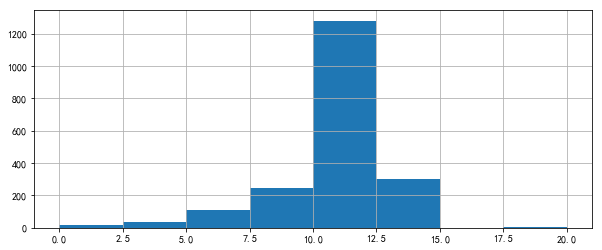

In [92]:
# 分析或可视化代码
df_clean["评分"].hist(bins=8,figsize=(10, 4))

In [93]:
df_clean["评分"].describe()

count    1993.00
mean       10.58
std         2.18
min         0.00
25%        10.00
50%        11.00
75%        12.00
max        20.00
Name: 评分, dtype: float64

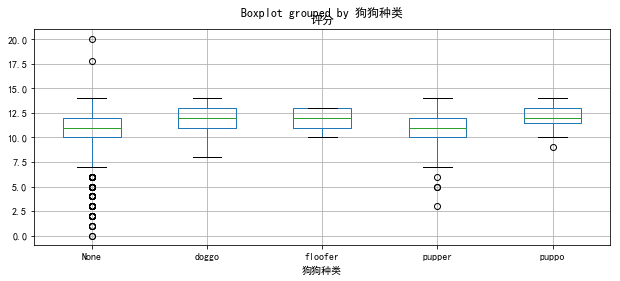

In [94]:
df_clean.boxplot(column='评分',by='狗狗种类',figsize=(10, 4), fontsize=10)

狗狗评分的平均值为11.5分，范围从0到20分，呈现中部集中态势。由图可见，大部分集中在10-12.5分。各种类狗狗评分差异不太明显。

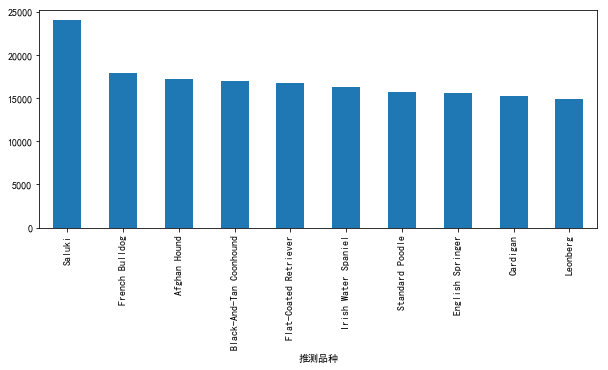

In [95]:
df_clean.groupby("推测品种").mean()["点赞数"].sort_values(ascending=False)[:10].plot(kind="bar", figsize=(10, 4), fontsize=10)

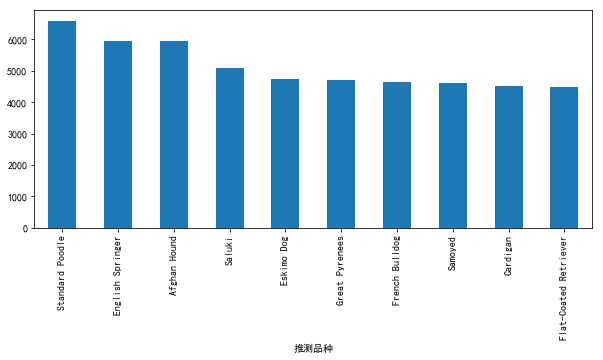

In [96]:
df_clean.groupby("推测品种").mean()["转发数"].sort_values(ascending=False)[:10].plot(kind="bar", figsize=(10,4), fontsize=10)

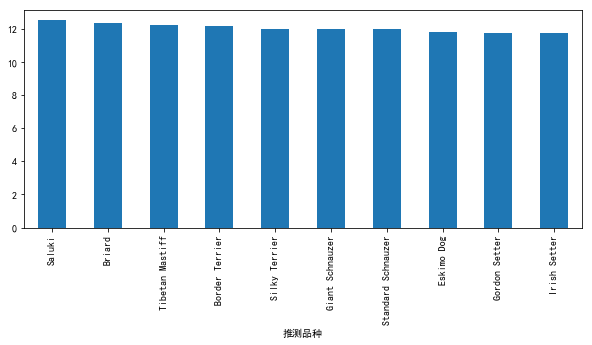

In [97]:
df_clean.groupby("推测品种").mean()["评分"].sort_values(ascending=False)[:10].plot(kind="bar", figsize=(10, 4), fontsize=10)

In [98]:
df_clean.groupby("推测品种").mean()["点赞数"].sort_values(ascending=False)[:10]

推测品种
Saluki                     23996.25
French Bulldog             17854.77
Afghan Hound               17250.67
Black-And-Tan Coonhound    16952.50
Flat-Coated Retriever      16731.62
Irish Water Spaniel        16335.33
Standard Poodle            15732.14
English Springer           15631.22
Cardigan                   15251.71
Leonberg                   14870.00
Name: 点赞数, dtype: float64

In [99]:
df_clean.groupby("推测品种").mean()["转发数"].sort_values(ascending=False)[:10]

推测品种
Standard Poodle          6602.14
English Springer         5948.67
Afghan Hound             5946.00
Saluki                   5103.25
Eskimo Dog               4742.44
Great Pyrenees           4704.00
French Bulldog           4656.38
Samoyed                  4597.43
Cardigan                 4513.65
Flat-Coated Retriever    4500.12
Name: 转发数, dtype: float64

In [100]:
df_clean.groupby("推测品种").mean()["评分"].sort_values(ascending=False)[:10]

推测品种
Saluki                12.50
Briard                12.33
Tibetan Mastiff       12.25
Border Terrier        12.14
Silky Terrier         12.00
Giant Schnauzer       12.00
Standard Schnauzer    12.00
Eskimo Dog            11.78
Gordon Setter         11.75
Irish Setter          11.75
Name: 评分, dtype: float64

大部分点赞数高的狗狗品种转发数越高。Saluki三项排名均靠前，算得上是最受欢迎的狗狗品种了。

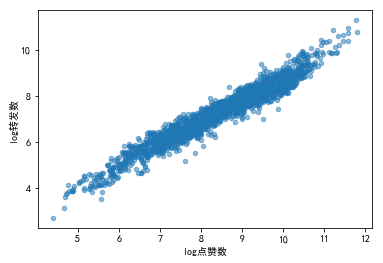

In [101]:
df_img=df_clean.copy()
df_img["log转发数"]=np.log(df_img["转发数"])
df_img["log点赞数"]=np.log(df_img["点赞数"])
df_img.plot(x="log点赞数",y="log转发数",kind="scatter",alpha=0.5)

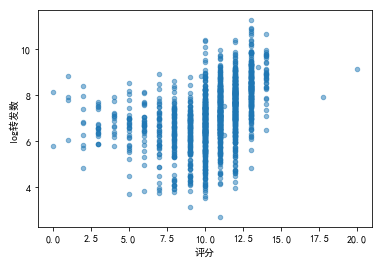

In [102]:
df_img.plot(x="评分",y="log转发数",kind="scatter",alpha=0.5)

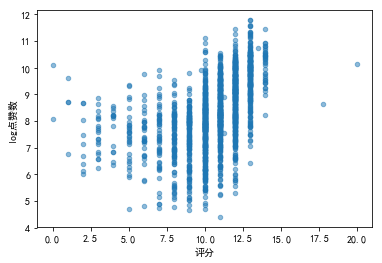

In [103]:
df_img.plot(x="评分",y="log点赞数",kind="scatter",alpha=0.5)

评分较高的狗狗，转发数与点赞数也较高。转发数、点赞数有正向线性的关系。